In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import torch 
from identity_net import IdentityNet
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [10]:
x = torch.linspace(-5, 5, 1000).unsqueeze(1)
y = x.clone()
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

nets = []
for activation in [nn.ReLU(), nn.Tanh(), nn.Sigmoid(), nn.ELU(), nn.SiLU(), nn.Identity(), nn.PReLU()]:
    net = IdentityNet(activation)
    loss = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=1e-3)
    for epoch in range(10_000):
        for xb, yb in dataloader:
            optimizer.zero_grad()
            y_pred = net(xb)
            l = loss(y_pred, yb)
            l.backward()
            optimizer.step()
    nets.append(net)



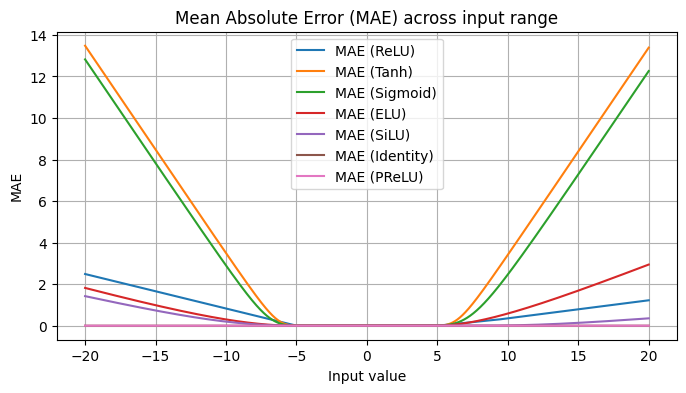

In [11]:
import matplotlib.pyplot as plt

val = torch.linspace(-20, 20, 10000).unsqueeze(1)
plt.figure(figsize=(8, 4))

activation_names = ["ReLU", "Tanh", "Sigmoid", "ELU", "SiLU", "Identity", "PReLU"]

for net, act_name in zip(nets, activation_names):
    out = net(val)
    gt = val
    mae = torch.abs(out - gt)
    plt.plot(val.squeeze().numpy(), mae.detach().numpy(), label=f"MAE ({act_name})")

plt.xlabel("Input value")
plt.ylabel("MAE")
plt.title("Mean Absolute Error (MAE) across input range")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
x = torch.linspace(-5, 5, 1000).unsqueeze(1)
y = x.clone()
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

nets = []
for activation in [nn.ReLU(), nn.Tanh(), nn.Sigmoid(), nn.ELU(), nn.SiLU(), nn.Identity(), nn.PReLU()]:
    net = IdentityNetRes(activation)
    loss = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=1e-3)
    for epoch in range(10_000):
        for xb, yb in dataloader:
            optimizer.zero_grad()
            y_pred = net(xb)
            l = loss(y_pred, yb)
            l.backward()
            optimizer.step()
    nets.append(net)



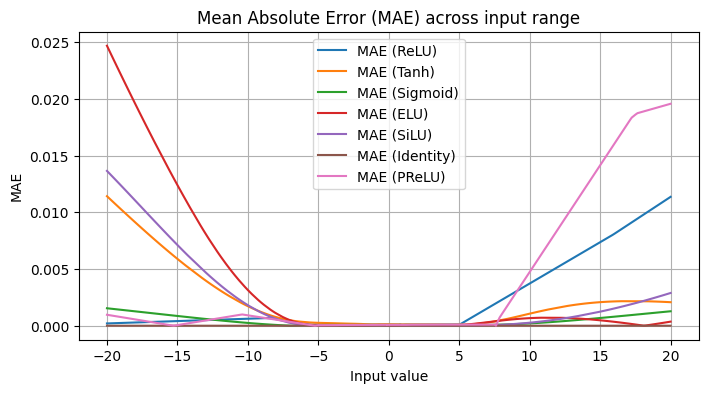

In [14]:
import matplotlib.pyplot as plt

val = torch.linspace(-20, 20, 10000).unsqueeze(1)
plt.figure(figsize=(8, 4))

activation_names = ["ReLU", "Tanh", "Sigmoid", "ELU", "SiLU", "Identity", "PReLU"]

for net, act_name in zip(nets, activation_names):
    out = net(val)
    gt = val
    mae = torch.abs(out - gt)
    plt.plot(val.squeeze().numpy(), mae.detach().numpy(), label=f"MAE ({act_name})")

plt.xlabel("Input value")
plt.ylabel("MAE")
plt.title("Mean Absolute Error (MAE) across input range")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
from nac import NAC


class NACNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            NAC(1, 8),
            NAC(8, 8),
            NAC(8, 8),
            NAC(8, 1)
        )

    def forward(self, x):
        return self.net(x)
x = torch.linspace(-5, 5, 1000).unsqueeze(1)
y = x.clone()
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

nets = []
net = NACNet()
loss = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)
for epoch in range(10_000):
    for xb, yb in dataloader:
        optimizer.zero_grad()
        y_pred = net(xb)
        l = loss(y_pred, yb)
        l.backward()
        optimizer.step()
nets.append(net)




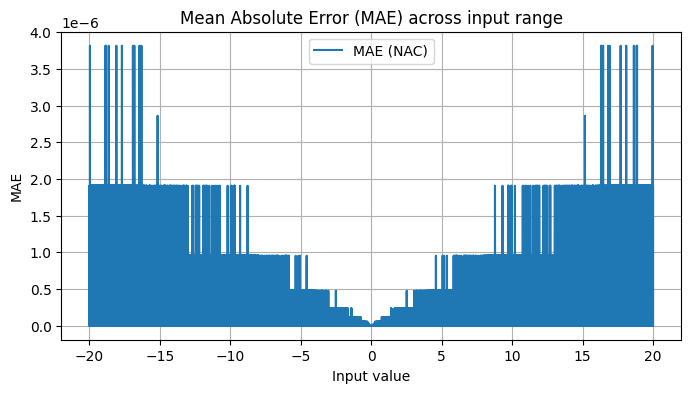

In [4]:
import matplotlib.pyplot as plt

val = torch.linspace(-20, 20, 10000).unsqueeze(1)
plt.figure(figsize=(8, 4))

activation_names = ["NAC"]

for net, act_name in zip(nets, activation_names):
    out = net(val)
    gt = val
    mae = torch.abs(out - gt)
    plt.plot(val.squeeze().numpy(), mae.detach().numpy(), label=f"MAE ({act_name})")

plt.xlabel("Input value")
plt.ylabel("MAE")
plt.title("Mean Absolute Error (MAE) across input range")
plt.legend()
plt.grid(True)
plt.show()
